In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
from typing import NamedTuple
import math
%matplotlib inline

In [17]:
def basic_length_function(text, index):
    return abs((len(text) / 2 - 1) - index) + 1

In [28]:
def log_length_function(text, index):
    diff = (len(text) / 2 - 1) - index
    return math.log(abs(diff) +1) +1

In [34]:
def plot_text(text, len_func):
    scores = [base_score(text, x[0], len_func) for x in enumerate(text)]
    plt.plot([x for x in range(len(scores))], scores)

In [36]:
beginning = """Stately, plump Buck Mulligan came from the stairhead, bearing a bowl of lather on which a mirror and a razor lay crossed. A yellow dressinggown, ungirdled, was sustained gently behind him on the mild morning air. He held the bowl aloft and intoned:"""

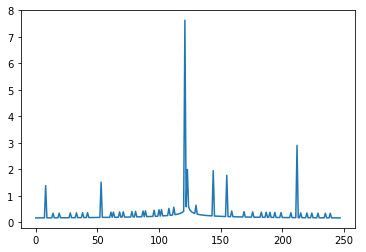

In [39]:
plot_text(beginning, log_length_function)

In [40]:
class PivotPoint(NamedTuple):
    split_at: int
    left_part_length: int
    right_part_length: int

    @property
    def total_length(self):
        return self.left_part_length + self.right_part_length


def pivot_point(text: str) -> PivotPoint:
    """Find a place to split string in about two. Preference order:
    1. Newlines (score 16)
    2. Punctuation that is immediately followed by whitespace (score 8)
    3. Other whitespace (score 2)
    4. Any other character (score 1)"""
    scores = [base_score(text, x[0], log_length_function) for x in enumerate(text)]
    break_at = max([x for x in enumerate(scores)], key=lambda x: x[1])[0]
    return PivotPoint(break_at, len(text[:break_at+1]), len(text[break_at+1:]))

In [41]:
pivot_point(beginning)

PivotPoint(split_at=121, left_part_length=122, right_part_length=126)

In [42]:
beginning[:122]

'Stately, plump Buck Mulligan came from the stairhead, bearing a bowl of lather on which a mirror and a razor lay crossed. '

In [31]:
def base_score(text: str, index: int, len_func) -> float:
    """Find a place to split string in two and in about two equal halves. Preference order:
    1. Newlines (score 16 / distance to the midpoint)
    2. "!.?" that is immediately followed by whitespace (score 16/ distance to the midpoint)
    3. Other punctuation immediately followed by whitespace (score 8/ distance to the midpoint)
    3. Other whitespace (score 2/ distance to the midpoint)
    4. Any other character (score 1/ distance to the midpoint)"""
    if 0 <= index < len(text):
        cur_char = text[index]
        prev_char = text[index - 1] if index - 1 > 0 else " "
        diff_to_center = len_func(text, index)
        if cur_char == "\n":
            return 16 / diff_to_center
        elif cur_char in string.whitespace and prev_char in "!?.":
            return 16 / diff_to_center
        elif cur_char in string.whitespace and prev_char in string.punctuation:
            return 8 / diff_to_center
        elif cur_char in string.whitespace:
            return 2 / diff_to_center
        else:
            return 1 / diff_to_center
    else:
        return -1